In [1]:
import dash
from dash import dcc, html, Input, Output, dash_table, Dash, callback
import plotly.express as px
import pandas as pd
import numpy as np

In [3]:
def load_and_process_data():
      # 生成四个卡片数据（暂定全静态）
      card_data = [
        {
            "title": "营业收入（万元）",
            "today": 101,
            "yesterday": 12,
            "month": 13,
            "year": 123
        },
        {
            "title": "营业成本（万元）",
            "today": 101,
            "yesterday": 12,
            "month": 13,
            "year": 123
        },
        {
            "title": "利润（万元）",
            "today": 101,
            "yesterday": 12,
            "month": 13,
            "year": 123
        },
        {
            "title": "毛利率（%）",
            "today": 101,
            "yesterday": 12,
            "month": 13,
            "year": 123
        }
      ]
#     df1 = pd.read_csv('table1.csv')  # 表1处理逻辑
#     df2 = pd.read_csv('table2.csv')  # 表2处理逻辑


      return {
               'card_data': card_data
    #         'data1': df1,
    #         'data2': df2,
    #         # ... 其他处理后的数据集
      }

processed_data = load_and_process_data() # 初始化数据

In [4]:
processed_data

{'card_data': [{'title': '营业收入（万元）',
   'today': 101,
   'yesterday': 12,
   'month': 13,
   'year': 123},
  {'title': '营业成本（万元）',
   'today': 101,
   'yesterday': 12,
   'month': 13,
   'year': 123},
  {'title': '利润（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123},
  {'title': '毛利率（%）',
   'today': 101,
   'yesterday': 12,
   'month': 13,
   'year': 123}]}

In [8]:
cards=processed_data['card_data']
cards

[{'title': '营业收入（万元）',
  'today': 101,
  'yesterday': 12,
  'month': 13,
  'year': 123},
 {'title': '营业成本（万元）',
  'today': 101,
  'yesterday': 12,
  'month': 13,
  'year': 123},
 {'title': '利润（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123},
 {'title': '毛利率（%）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}]

In [9]:
# 访问第一个卡片的标题
cards[0] # 正确！

{'title': '营业收入（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}

In [10]:
# 遍历所有卡片
for card in cards:
    print(card)

{'title': '营业收入（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}
{'title': '营业成本（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}
{'title': '利润（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}
{'title': '毛利率（%）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}


In [12]:
for i,card in enumerate(cards):
    print(i,card)

0 {'title': '营业收入（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}
1 {'title': '营业成本（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}
2 {'title': '利润（万元）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}
3 {'title': '毛利率（%）', 'today': 101, 'yesterday': 12, 'month': 13, 'year': 123}


In [14]:
# 同理
nav_items = [
    {"label": "经营概览", "path": "/"},
    {"label": "营业收入", "path": "/revenue"},
    {"label": "营业成本", "path": "/cost"},
    {"label": "毛利率", "path": "/gross-margin"},
    {"label": "利润率", "path": "/profit-margin"}
]

In [15]:
nav_items[0]

{'label': '经营概览', 'path': '/'}

In [23]:
for i, item in enumerate(nav_items):
    print(i,item)
    print('------------')
    for key,value in item.items():
        print(f"{key},{value}")

0 {'label': '经营概览', 'path': '/'}
------------
label,经营概览
path,/
1 {'label': '营业收入', 'path': '/revenue'}
------------
label,营业收入
path,/revenue
2 {'label': '营业成本', 'path': '/cost'}
------------
label,营业成本
path,/cost
3 {'label': '毛利率', 'path': '/gross-margin'}
------------
label,毛利率
path,/gross-margin
4 {'label': '利润率', 'path': '/profit-margin'}
------------
label,利润率
path,/profit-margin


In [19]:
for i, item in nav_items:
    print(i,item) # 只在整体变色时候用

label path
label path
label path
label path
label path


In [2]:
df = pd.DataFrame({
    '部门': ['销售部', '市场部', '研发部', '销售部', '市场部', '研发部'],
    '指标': ['收入', '收入', '收入', '利润', '利润', '利润'],
    '目标值': [800, 500, 600, 200, 150, 180],
    '完成值': [720, 450, 540, 180, 140, 162]
})
df

,部门,指标,目标值,完成值
0,销售部,收入,800,720
1,市场部,收入,500,450
2,研发部,收入,600,540
3,销售部,利润,200,180
4,市场部,利润,150,140
5,研发部,利润,180,162


In [4]:
target = pd.read_excel('/Users/shibo/pythonProject1/可视化/target.xlsx')
target

,部门,时间,目标值-收入(不含税 万元),完成值-收入(不含税 万元),目标值-毛利润(不含税 万元),完成值-毛利润(不含税 万元)
0,合营事业部,2024-01-01,1000,900.0,30.0,22.50
1,合营事业部,2024-02-01,900,1000.0,27.0,25.00
2,合营事业部,2024-03-01,900,900.0,27.0,22.50
3,合营事业部,2024-04-01,800,800.0,24.0,20.00
4,合营事业部,2024-05-01,800,800.0,24.0,20.00
5,合营事业部,2024-06-01,800,1000.0,24.0,25.00
6,合营事业部,2024-07-01,800,900.0,24.0,22.50
7,合营事业部,2024-08-01,700,600.0,21.0,15.00
8,合营事业部,2024-09-01,700,650.0,21.0,16.25
9,合营事业部,2024-10-01,700,NaN,21.0,NaN


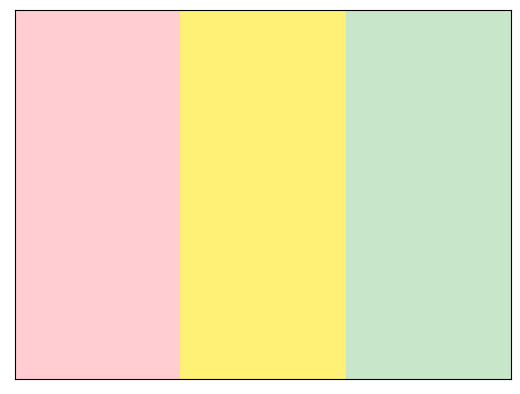

In [12]:
import matplotlib.pyplot as plt

# 定义红黄绿三种颜色的RGB值
colors = ['#FFCDD2', '#FFF176', '#C8E6C9']  # 红色、黄色、绿色

# 创建一个图形和坐标轴
fig, ax = plt.subplots()

# 在坐标轴上绘制颜色块
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# 设置坐标轴范围和刻度
ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# 显示图形
plt.show()